# CA05 Logistic Regression

Loading in Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics

Loading in dataset

In [2]:
cvd = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

Exploratory Analysis

In [3]:
cvd.head(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.00,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.00,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.50,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.00,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.00,0,0,0,2,1,1,2
5,0,67,1,3,3,140.0,35.5,101.0,87.2,0.00,0,1,0,1,1,4,4
6,0,68,1,2,1,101.0,39.0,93.0,80.5,9.20,0,0,0,2,3,4,4
7,0,67,1,2,1,107.0,32.0,80.0,73.2,0.00,0,1,0,2,2,4,4
8,0,44,1,2,1,100.0,36.5,89.0,79.1,6.75,0,0,0,3,3,4,4
9,0,42,1,2,1,105.0,35.5,90.0,78.1,21.00,0,0,0,3,2,3,3


In [4]:
cvd.tail(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3232,1,55,1,4,1,117.0,35.5,107.0,88.4,0.0,3,0,0,3,1,5,4
3233,1,71,1,1,2,114.0,35.0,117.0,85.1,0.0,0,1,0,1,3,4,4
3234,1,55,1,3,1,93.0,29.5,81.0,76.7,0.0,0,0,0,3,2,4,4
3235,1,59,1,1,1,104.0,40.0,101.0,87.5,0.0,0,1,0,3,2,5,4
3236,1,54,1,2,1,115.0,36.0,103.0,84.4,14.0,0,0,0,3,2,5,4
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


In [5]:
cvd.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [6]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [7]:
cvd.groupby('cvd_4types').mean()

,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
cvd_4types,,,,,,,,,,,,,,,,
0,63.716328,1.156509,2.281415,1.454477,105.176915,37.050640,93.896892,82.393980,12.005719,0.473288,0.287434,0.045147,2.481565,2.319037,4.265613,3.957863
1,65.601673,1.051751,2.357554,1.308939,105.563170,37.898134,99.511521,83.329378,13.528071,0.401464,0.355985,0.083116,2.468374,2.255097,4.311553,3.800314


In [8]:
cvd.cvd_4types.value_counts()

1    1913
0    1329
Name: cvd_4types, dtype: int64

Visualizing dataset to examine distribution

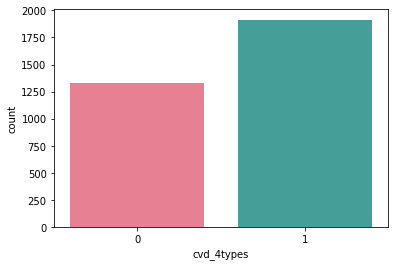

In [11]:
sns.countplot(x='cvd_4types', data=cvd, palette='husl')
plt.show()

Setting independent variables and prediction

In [12]:

x = cvd[['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab','bend25', 'happy25', 'tired25', 'hlthlm25']] #Here we are storing our independent variables
y = cvd['cvd_4types']#Dependent variable

Splitting data into testing and training set

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

Fitting the logistic model with the training set and comparing with the prediction

In [16]:
model = LogisticRegression(penalty = 'l2', solver='liblinear', C=1, random_state=101)
fit_model = model.fit(x_train, y_train)#passing training and testing set through the model
y_pred = fit_model.predict(x_test)

Feature Importance in order of decreasing influence on CVD Risk

In [17]:
feature_cvd = pd.DataFrame({'feature':list(x_train.columns), 'feature_cvd':[abs(i) for i in model.coef_[0]]})
feature_cvd.sort_values('feature_cvd', ascending = False)

,feature,feature_cvd
1,race,0.883611
15,hlthlm25,0.561437
11,parrptdiab,0.541506
2,educat,0.310915
14,tired25,0.126422
3,mstat,0.122914
12,bend25,0.116301
10,srhype,0.105461
6,waist,0.073628
13,happy25,0.051989


Examining accuracy of model with AUC and F1 scores followed by a ROC curve

In [21]:
auc_score = roc_auc_score(y_test, y_pred)#figuring out the binary classifiers ability through auc 
F1 = f1_score(y_test, y_pred)#figuring out the binary classifiers ability through f1 

In [22]:
print('auc_score:', auc_score)
print('F1_Score:', F1)

auc_score: 0.6660340285874682
F1_Score: 0.7576736672051696


The above scores indicate a strong binary classifier for this case with regards to figuring out the cvd risk

In [27]:
fpr, tpr, threshold = roc_curve(y_test, y_pred) #setting threshold for ROC curve

In [28]:
AUC_score = metrics.auc(fpr, tpr)

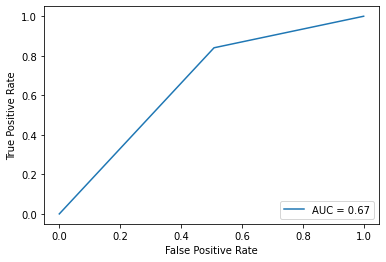

In [29]:
ROC_curve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc_score)#Plotting ROC curve and we can see with a score of 0.67 it looks good
ROC_curve.plot()
plt.show()